##### Copyright 2019 The TensorFlow Authors.


# Shopee Product Detection

## Setup

In [76]:
import functools

import numpy as np
import csv
import tensorflow as tf
import pandas as pd

## Load data

To start, let's look at the top of the CSV file to see how it is formatted.

In [85]:
train_file_path = '../shopee_data/train/train.csv'
test_file_path = '../shopee_data/test/test.csv'

train_data = pd.read_csv(train_file_path)
train_data = train_data.sort_values(['category'])
print(train_data)

##double check that all files are correct
# from os import listdir
# from os.path import isfile, join
# mypath = 'data/train/train/00'
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

# for names in onlyfiles:
#     print(train_data[train_data.eq(names).any(1)])

                                   filename  category
55585  9f89d9582e4d811330e83e3628b84114.jpg         0
53785  0e506b549c296564b55ed42283b87f64.jpg         0
53784  096f4541edcd6d8c209512f4a1a149a9.jpg         0
53783  89e70f1b22897e15782cda74fae117fc.jpg         0
53782  7f4c6b4f2177fa92d0d94b4ee2003ed3.jpg         0
53781  4fedacd99d2d569affff48eae083b98f.jpg         0
53780  c59258a816ba6de3c8b9b5bf8f093315.jpg         0
53779  a5d969df770cb24ce1957de1f937191c.jpg         0
53786  d949d9bfd5e7fa8a2815e9901a031e45.jpg         0
53778  c73b6c65ac995d9dc45765ffc26c01a6.jpg         0
53776  6656495b2119335a0b682d2125203b33.jpg         0
53775  91506de1921bd9929a46d7196989cfb2.jpg         0
53774  2de064908a1ef6efbcb45aee21809998.jpg         0
53773  0e4b8f8739db2d5d3da346a43d751521.jpg         0
53772  f8d027b4e4480c1cae7af9b68d283375.jpg         0
53771  c5266108a438b3227b3c62f913671f6a.jpg         0
53770  1cd5494889e84f7657bd4444b764dc41.jpg         0
53777  db2d43a517c9edc8bf535

You can [load this using pandas](pandas_dataframe.ipynb), and pass the NumPy arrays to TensorFlow. If you need to scale up to a large set of files, or need a loader that integrates with [TensorFlow and tf.data](../../guide/data.ipynb) then use the `tf.data.experimental.make_csv_dataset` function:

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Load all the pictures from each file

In [86]:
batch_size = 32
epochs = 15
IMG_HEIGHT = 160    #Image size will be 160x160 pixels
IMG_WIDTH = 160
train_data_dir = '../shopee_data/train/train'

train_datagen = ImageDataGenerator(rescale=1./255,
#                                      shear_range=0.2,
#                                      zoom_range=0.2,
#                                      horizontal_flip=True,
                                    validation_split=0.1) # set validation split

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        batch_size=batch_size,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        shuffle=True,
        class_mode='categorical',
        subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
        train_data_dir, # same directory as training data),
        batch_size=batch_size,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        shuffle=True,
        class_mode='categorical',
        subset='validation') # set as validation data


Found 94869 images belonging to 42 classes.
Found 10523 images belonging to 42 classes.


# visualise training data

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


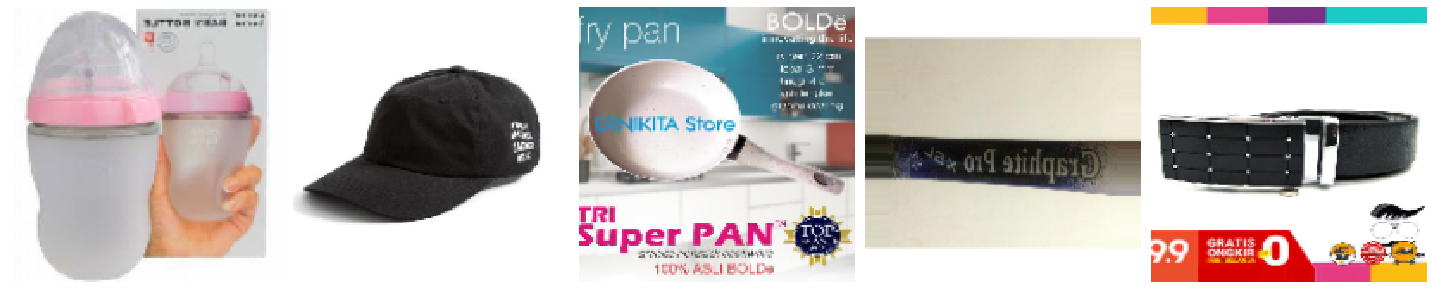

In [84]:
sample_training_images, labels = next(train_generator)
print(labels[:5])
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(sample_training_images[:5])

In [75]:
train_generator.shape()

AttributeError: 'DirectoryIterator' object has no attribute 'shape'

todo:
1. combine with transfer learning ipynb
2. create a test set (10%)
3. Create pipeline to output test CSV results
4. Do some data augmentation
5. Do fine tuning